In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import  cross_validate
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import datetime

## Read CSV

In [4]:
#parse_dates = ['timestamp']

In [23]:
convert = pd.read_csv('data_12-5_new.csv', sep = ',', encoding = 'utf-8')
convert.head()
convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   frc                 1385 non-null   object 
 1   currentSpeed        1385 non-null   int64  
 2   freeFlowSpeed       1385 non-null   int64  
 3   currentTravelTime   1385 non-null   int64  
 4   freeFlowTravelTime  1385 non-null   int64  
 5   confidence          1385 non-null   float64
 6   roadClosure         1385 non-null   bool   
 7   timestamp           1385 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 77.2+ KB


## Fix timestamp

In [24]:
convert['timestamp'] = convert['timestamp'].apply(lambda x: x[:-3])
convert.head()
#convert['timestamp'] = pd.to_datetime(convert['timestamp'])

,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure,timestamp
0,FRC2,33,44,51,38,0.96,False,2021-04-26 15
1,FRC2,44,44,38,38,0.95,False,2021-04-26 15
2,FRC2,44,44,38,38,0.95,False,2021-04-26 15
3,FRC2,44,44,38,38,0.95,False,2021-04-26 15
4,FRC2,32,43,53,39,0.97,False,2021-04-26 15


In [25]:
convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   frc                 1385 non-null   object 
 1   currentSpeed        1385 non-null   int64  
 2   freeFlowSpeed       1385 non-null   int64  
 3   currentTravelTime   1385 non-null   int64  
 4   freeFlowTravelTime  1385 non-null   int64  
 5   confidence          1385 non-null   float64
 6   roadClosure         1385 non-null   bool   
 7   timestamp           1385 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 77.2+ KB


In [26]:
convert.head()

,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure,timestamp
0,FRC2,33,44,51,38,0.96,False,2021-04-26 15
1,FRC2,44,44,38,38,0.95,False,2021-04-26 15
2,FRC2,44,44,38,38,0.95,False,2021-04-26 15
3,FRC2,44,44,38,38,0.95,False,2021-04-26 15
4,FRC2,32,43,53,39,0.97,False,2021-04-26 15


In [27]:
convert.describe()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,39.478700,43.683032,45.553791,38.316968,0.956390
std,7.578378,0.488192,19.221523,0.488192,0.046207
min,6.000000,42.000000,38.000000,36.000000,0.510000
25%,34.000000,43.000000,38.000000,38.000000,0.950000
50%,44.000000,44.000000,38.000000,38.000000,0.970000
75%,44.000000,44.000000,49.000000,39.000000,0.980000
max,44.000000,46.000000,282.000000,40.000000,1.000000


In [28]:
convert = convert.groupby('timestamp').mean()

In [29]:
convert.head()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure
timestamp,,,,,,
2021-04-26 0,44.000000,44.000000,38.000000,38.000000,0.860000,False
2021-04-26 15,40.166667,43.833333,42.666667,38.166667,0.958333,False
2021-04-26 16,38.666667,43.500000,44.833333,38.500000,0.965000,False
2021-04-26 17,34.000000,43.666667,50.500000,38.333333,0.966667,False
2021-04-26 18,27.666667,43.500000,61.000000,38.500000,0.970000,False


In [30]:
convert = convert.drop(columns = ['roadClosure'])

## Visualize Data 

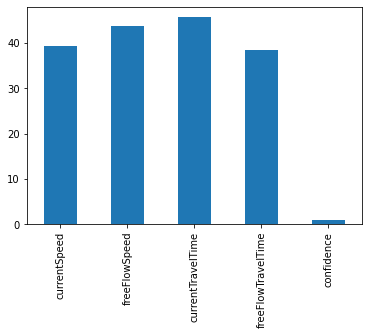

In [31]:
df = convert.mean().plot(kind='bar')

## Normalize data

In [32]:
scaler_freeFlow = MinMaxScaler()
scaler_currentTravelTime = MinMaxScaler()
scaler_freeFlowTravel = MinMaxScaler()
scaler_currentSpeed = MinMaxScaler()


convert[['freeFlowSpeed']] =  scaler_freeFlow.fit_transform(convert[['freeFlowSpeed']])
convert[['currentTravelTime']] =  scaler_currentTravelTime.fit_transform(convert[['currentTravelTime']])
convert[['freeFlowTravelTime']] =  scaler_freeFlowTravel.fit_transform(convert[['freeFlowTravelTime']])
convert[['currentSpeed']] =  scaler_currentSpeed.fit_transform(convert[['currentSpeed']])


In [33]:
convert.head()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence
timestamp,,,,,
2021-04-26 0,1.000000,1.000000,0.000000,0.000000,0.860000
2021-04-26 15,0.838028,0.833333,0.057026,0.166667,0.958333
2021-04-26 16,0.774648,0.500000,0.083503,0.500000,0.965000
2021-04-26 17,0.577465,0.666667,0.152749,0.333333,0.966667
2021-04-26 18,0.309859,0.500000,0.281059,0.500000,0.970000


In [34]:
y = convert['currentSpeed']
x = convert.drop(columns = ['currentSpeed'])

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 40)

train_x

,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence
timestamp,,,,
2021-05-07 18,0.500000,0.248473,0.500000,0.978333
2021-05-01 9,1.000000,0.000000,0.000000,0.970000
2021-05-04 22,1.000000,0.000000,0.000000,0.980000
2021-05-06 14,0.166667,0.124236,0.833333,0.983333
2021-04-27 6,1.000000,0.000000,0.000000,0.860000
...,...,...,...,...
2021-05-09 23,1.000000,0.000000,0.000000,0.980000
2021-05-07 3,1.000000,0.000000,0.000000,0.970000
2021-04-26 21,1.000000,0.000000,0.000000,0.960000


In [35]:
convert.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 2021-04-26 0 to 2021-05-12 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   currentSpeed        236 non-null    float64
 1   freeFlowSpeed       236 non-null    float64
 2   currentTravelTime   236 non-null    float64
 3   freeFlowTravelTime  236 non-null    float64
 4   confidence          236 non-null    float64
dtypes: float64(5)
memory usage: 21.1+ KB


## Decision Tree

In [36]:
model_regression = DecisionTreeRegressor()

model_regression.fit(train_x, train_y)
predictions = model_regression.predict(test_x)
print(predictions)

score = model_regression.score(test_x, test_y)

[0.72535211 0.21830986 1.         0.90140845 1.         0.95774648
 0.26760563 1.         0.57746479 0.64788732 0.11971831 0.29577465
 1.         1.         0.8028169  0.30985915 0.8943662  1.
 0.70422535 0.50704225 0.72535211 1.         0.21830986 1.
 0.65492958 1.         0.95774648 1.         1.         0.83098592
 0.72535211 1.         0.77464789 0.23239437 0.38028169 0.8943662
 0.11971831 1.         1.         0.95774648 1.         0.95774648
 0.21830986 1.         0.95774648 0.36619718 1.         1.
 1.         1.         0.95774648 0.95774648 1.         0.34507042
 0.34507042 0.77464789 0.5        0.95774648 1.         1.
 0.29577465 0.29577465 0.4084507  0.5        1.         0.85915493
 1.         0.70422535 1.         0.71830986 0.78169014]


In [37]:
scores = cross_val_score(model_regression, x, y, cv=20)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.95 accuracy with a standard deviation of 0.06


## Other

In [38]:
model_regression_2 = DecisionTreeRegressor()

model_regression_2.fit(train_x, train_y)
predictions_2 = model_regression_2.predict(test_x)
#print(predictions_2)

print('MSE: ', np.sqrt(mean_squared_error(test_y,predictions_2))) 
print('Score: ', r2_score(test_y,predictions_2))

MSE:  0.0713977310877703
Score:  0.9277420704369714


In [39]:
[test_y] = scaler_currentSpeed.inverse_transform([test_y])
[train_y] = scaler_currentSpeed.inverse_transform([train_y])
[predictions_2] = scaler_currentSpeed.inverse_transform([predictions_2])

## Predictions

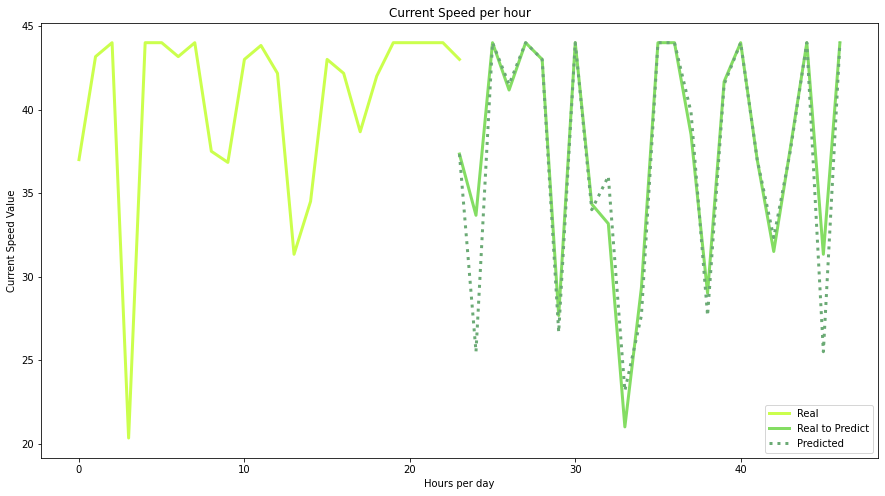

In [40]:
plt.figure(figsize = (15, 8))
plt.plot(range(len(train_y[-24:])), train_y[-24:], label = 'Real', color = '#CBFF4D', 
             linewidth = 3)
plt.plot(range(len(train_y[-24:]) - 1, len(train_y [-24:]) + len(test_y[:24]) - 1), test_y[:24], label = 'Real to Predict', 
             color = '#84DD63', linewidth = 3)
plt.plot(range(len(train_y[-24:]) - 1, len(train_y [-24:]) + len(test_y[:24]) - 1), predictions_2[:24], label = 'Predicted', 
              color = '#6BAA75', linestyle= 'dotted',linewidth = 3)
plt.title('Current Speed per hour')
plt.ylabel('Current Speed Value')
plt.xlabel('Hours per day')
plt.legend()
plt.show()